In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%cd ..
%cd results/hidden_loops
%ls

/Users/andrey/MIPT_projects/M1P_6_sem/2023-Project-119
/Users/andrey/MIPT_projects/M1P_6_sem/2023-Project-119/results/hidden_loops
0.1-0.1-10/ 0.1-0.9-10/ 0.3-0.5-10/ 0.5-0.3-10/ 0.9-0.1-10/ 0.9-0.9-10/
0.1-0.1-20/ 0.1-0.9-20/ 0.3-0.5-20/ 0.5-0.3-20/ 0.9-0.1-20/ 0.9-0.9-20/
0.1-0.3-10/ 0.3-0.1-10/ 0.3-0.9-10/ 0.5-0.5-10/ 0.9-0.3-10/
0.1-0.3-20/ 0.3-0.1-20/ 0.3-0.9-20/ 0.5-0.5-20/ 0.9-0.3-20/
0.1-0.5-10/ 0.3-0.3-10/ 0.5-0.1-10/ 0.5-0.9-10/ 0.9-0.5-10/
0.1-0.5-20/ 0.3-0.3-20/ 0.5-0.1-20/ 0.5-0.9-20/ 0.9-0.5-20/


In [32]:
# make pd.DataFrame from our results
hidden_loops = Path("")
results = []

chosen_step = 1200
for folder in sorted(hidden_loops.iterdir()):
    if folder.name != '.DS_Store':
        adherence, usage, step = folder.name.split('-')
        adherence = float(adherence)
        usage = float(usage)
        step = float(step)

        data = pd.read_csv(folder.name+f"/deviations/ridge-dev_step_{chosen_step}.csv")
        deviation = np.std(data['y'] - data['y_pred'])
        row = {"adherence" : adherence,
               "usage" : usage,
               "step" : step,
               "deviation" : deviation}
        results.append(row)

results = pd.DataFrame(results)
results

,adherence,usage,step,deviation
0,0.1,0.1,10.0,0.482788
1,0.1,0.1,20.0,0.460120
2,0.1,0.3,10.0,0.407227
3,0.1,0.3,20.0,0.435433
4,0.1,0.5,10.0,0.345794
5,0.1,0.5,20.0,0.340312
6,0.1,0.9,10.0,0.159512
7,0.1,0.9,20.0,0.178586
8,0.3,0.1,10.0,0.484819
9,0.3,0.1,20.0,0.461271


In [115]:
results[results['usage'] == 0.9]

,adherence,usage,step,deviation
6,0.1,0.9,10.0,0.159512
7,0.1,0.9,20.0,0.178586
14,0.3,0.9,10.0,0.161417
15,0.3,0.9,20.0,0.180683
22,0.5,0.9,10.0,0.169950
23,0.5,0.9,20.0,0.188202
30,0.9,0.9,10.0,0.259597
31,0.9,0.9,20.0,0.262024


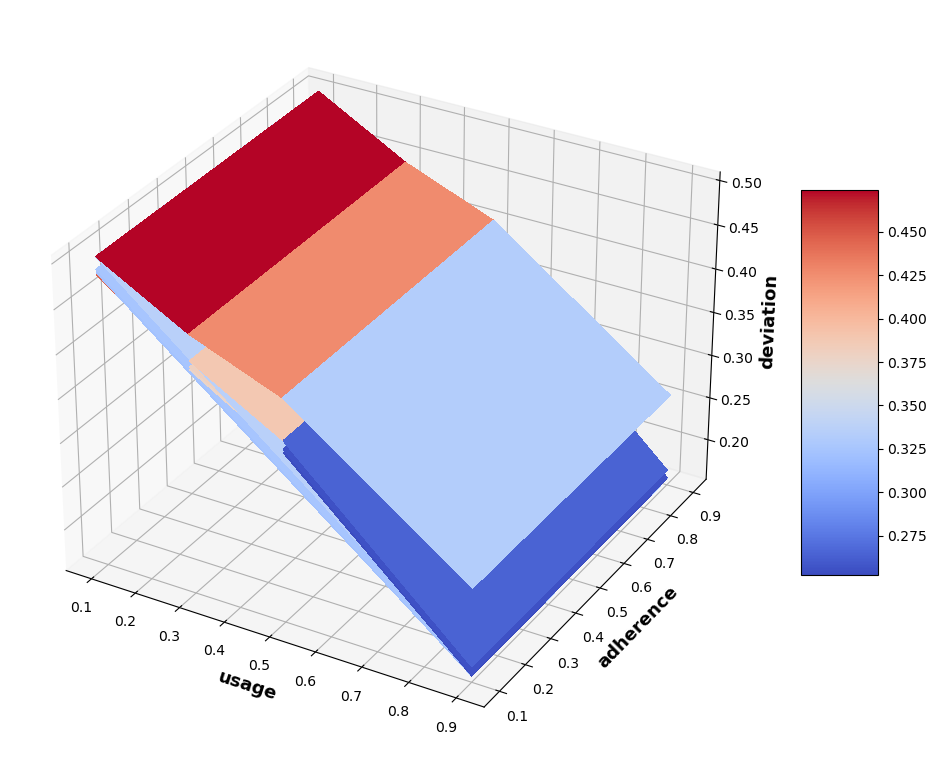

In [105]:
# making 3D plot of adherence, usage and deviation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (12, 10))

# preparing data
chosen_step = 10
adherence = results[results['step'] == chosen_step]['adherence']
usage = results[results['step'] == chosen_step]['usage']
deviation = results[results['step'] == chosen_step]['deviation']

#adherence, deviation = np.meshgrid(adherence, deviation)
#usage, deviation = np.meshgrid(usage, deviation)
usage, adherence = np.meshgrid(usage, adherence)
deviation, _ = np.meshgrid(deviation, deviation)

#plot
surf = ax.plot_surface(usage, adherence, deviation, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel("usage", fontsize = 13, fontweight='bold')
ax.set_ylabel("adherence", fontsize = 13, fontweight='bold')
ax.set_zlabel("deviation", fontsize = 13, fontweight='bold')
plt.show()

In [3]:
%cd ..
%ls

/Users/andrey/MIPT_projects/M1P_6_sem/2023-Project-119/results
hidden-loop/  hidden_loops/ single-model/


In [4]:
%cd hidden-loop

/Users/andrey/MIPT_projects/M1P_6_sem/2023-Project-119/results/hidden-loop


In [5]:
%cd deviations
%ls

/Users/andrey/MIPT_projects/M1P_6_sem/2023-Project-119/results/hidden-loop/deviations
ridge-dev_step_100.csv   ridge-dev_step_200.csv   ridge-dev_step_600.csv
ridge-dev_step_1000.csv  ridge-dev_step_300.csv   ridge-dev_step_700.csv
ridge-dev_step_1100.csv  ridge-dev_step_400.csv   ridge-dev_step_800.csv
ridge-dev_step_1200.csv  ridge-dev_step_500.csv   ridge-dev_step_900.csv


In [129]:
results[results['usage'] == 0.5]

,adherence,usage,step,deviation
4,0.1,0.5,10.0,0.345794
5,0.1,0.5,20.0,0.340312
12,0.3,0.5,10.0,0.349754
13,0.3,0.5,20.0,0.344972
20,0.5,0.5,10.0,0.359225
21,0.5,0.5,20.0,0.357232
28,0.9,0.5,10.0,0.406398
29,0.9,0.5,20.0,0.423608


In [25]:
# make pd.DataFrame from our results
chosen_step = 1200
data_1 = pd.read_csv(f"ridge-dev_step_{chosen_step}.csv")
deviation = np.std(data_1['y'] - data_1['y_pred'])

print(deviation)

2.4917999002956814


In [21]:
data_1

,y,y_pred
0,2.980156e+07,-9.644319e+12
1,6.111380e+06,-8.138968e+11
2,6.712572e+07,-1.380033e+13
3,2.951961e+06,1.038880e+13
4,8.864040e+06,1.899883e+13
...,...,...
595,4.882075e+14,9.967901e+12
596,9.128206e+14,3.360728e+13
597,3.653632e+14,-1.272786e+13
598,1.839601e+14,3.775234e+12
